In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
df1 = pd.read_excel("kayu mikro.xlsx")

In [3]:
df2 = pd.read_excel("kayu kecil.xlsx")

In [4]:
df3 = pd.read_excel("kayu menengah.xlsx")

In [5]:
df4 = pd.read_excel("kayu besar.xlsx")
df1

,Judul KBLI,Jumlah
0,"Industri Alat Dapur Dari Kayu, Rotan Dan Bambu",6
1,Industri Bangunan Prafabrikasi Dari Kayu,2
2,Industri Barang Bangunan Dari Kayu,24
3,"Industri Barang Dari Kayu, Rotan, Gabus Lainny...",21
4,Industri Furnitur Dari Kayu,236
5,Industri Kayu Bakar dan Pelet Kayu,27
6,Industri Kayu Laminasi,1
7,Industri Kayu Lapis,5
8,"Industri Kayu Lapis Laminasi, Termasuk Decorat...",8
9,Industri Kerajinan Ukiran Dari Kayu Bukan Mebe...,31


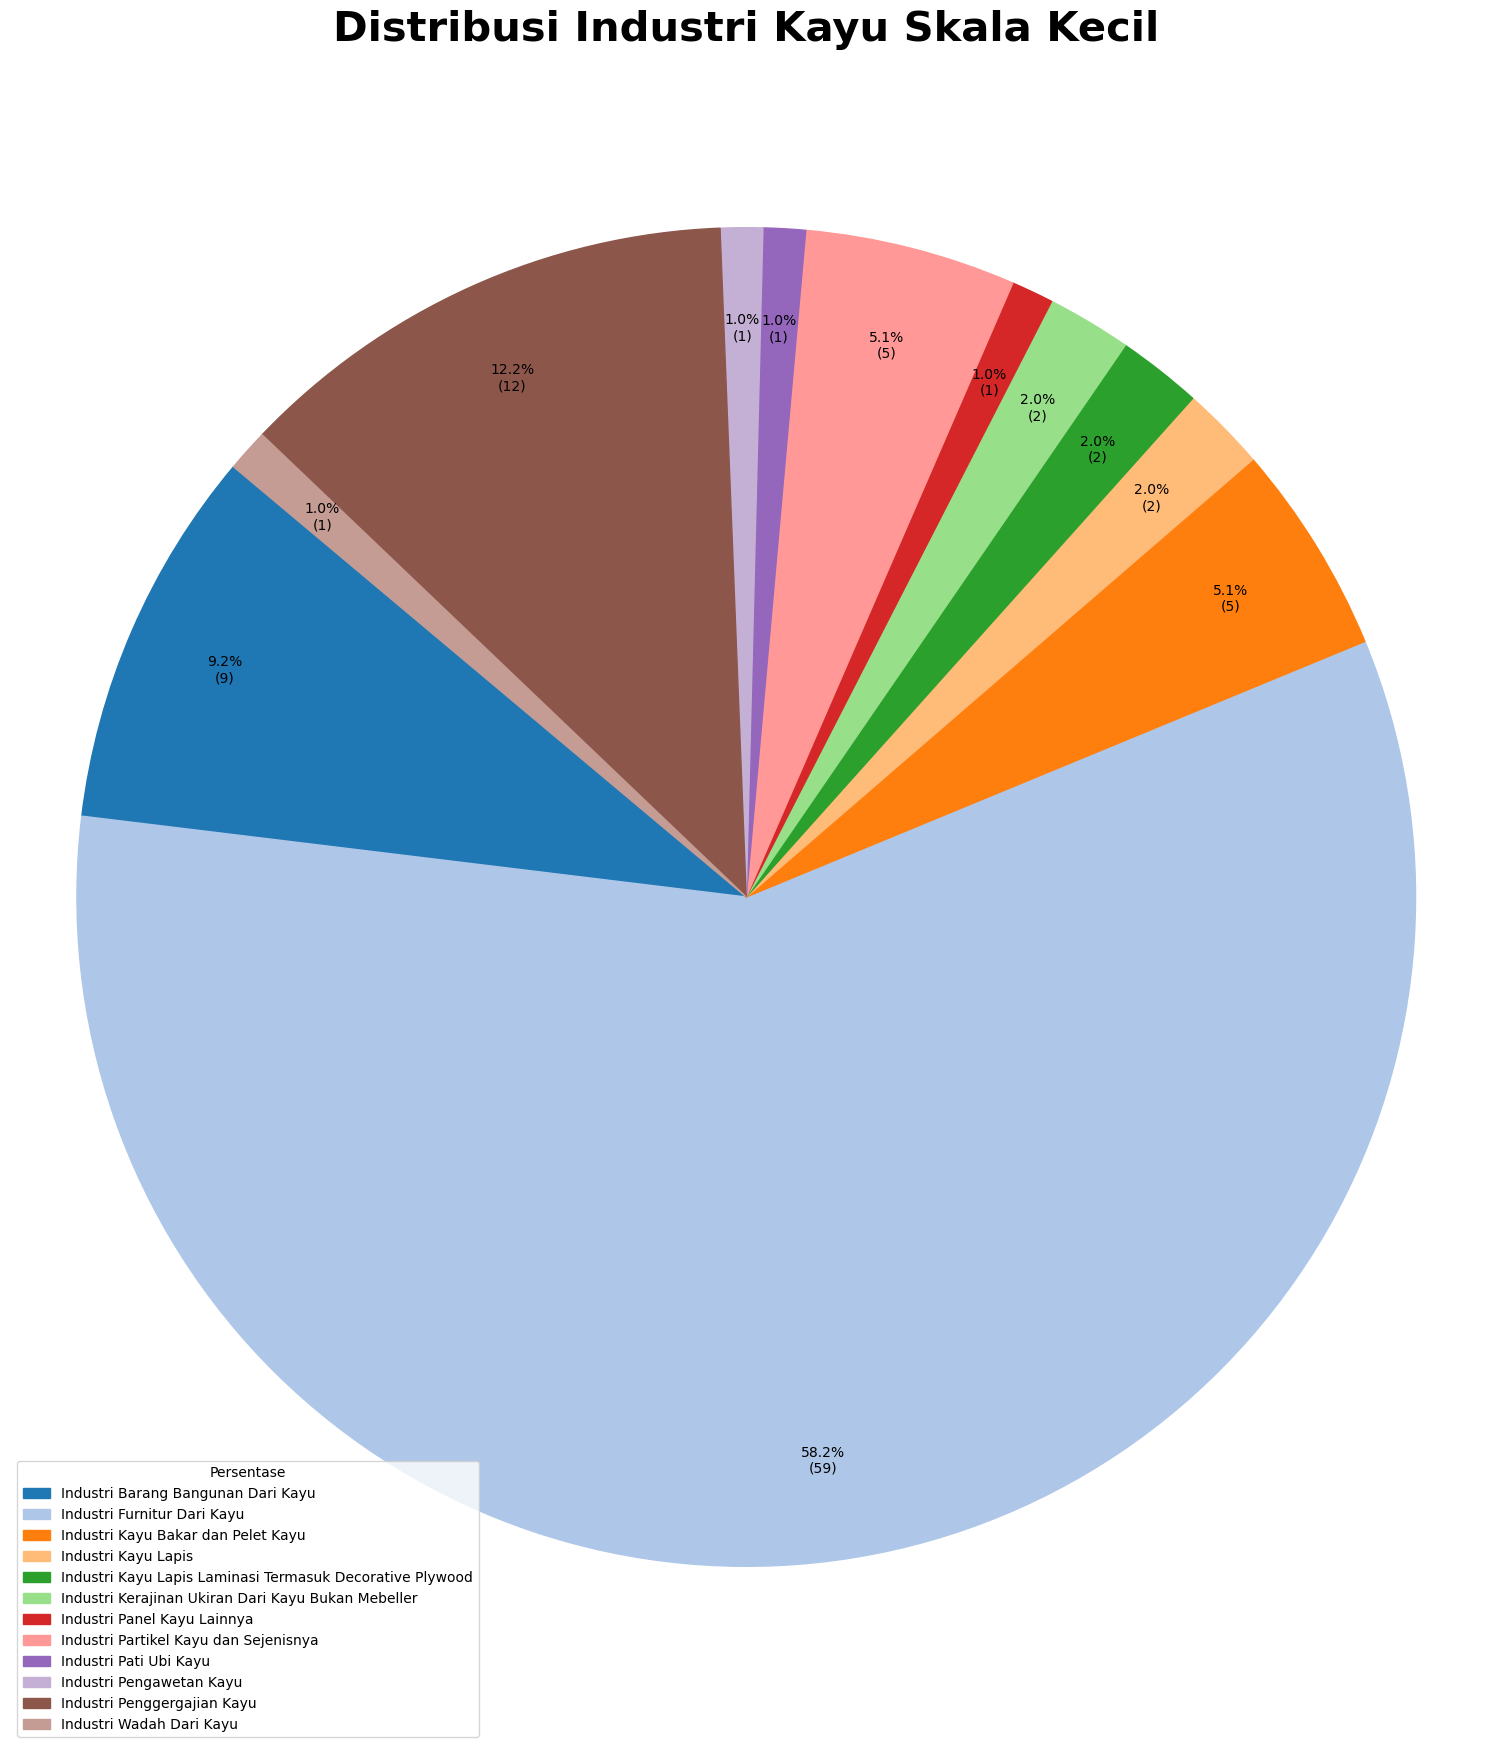

In [6]:
import matplotlib.pyplot as plt
from itertools import cycle

# Data
labels = ['Industri Barang Bangunan Dari Kayu', 'Industri Furnitur Dari Kayu', 'Industri Kayu Bakar dan Pelet Kayu', 
          'Industri Kayu Lapis', 'Industri Kayu Lapis Laminasi Termasuk Decorative Plywood', 
          'Industri Kerajinan Ukiran Dari Kayu Bukan Mebeller', 'Industri Panel Kayu Lainnya', 
          'Industri Partikel Kayu dan Sejenisnya', 'Industri Pati Ubi Kayu', 'Industri Pengawetan Kayu', 
          'Industri Penggergajian Kayu', 'Industri Wadah Dari Kayu']
sizes = [9, 57, 5, 2, 2, 2, 1, 5, 1, 1, 12, 1]

# Plot
fig, ax = plt.subplots(figsize=(19, 22))
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=lambda pct: '{:.1f}%\n({})'.format(pct, int(pct/sum(sizes) * 100)), pctdistance=0.85, startangle=140, textprops=dict(color="black"))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Define color cycle
colors = cycle(plt.cm.tab20.colors)

# Set different color for each wedge
for wedge in wedges:
    wedge.set_color(next(colors))

# Add count next to percentage
plt.legend(wedges, labels, title="Persentase", loc="best")

plt.title('Distribusi Industri Kayu Skala Kecil', loc='center', fontsize=30, fontweight='bold')

# Menyimpan diagram pie sebagai file gambar
plt.savefig('kayu skala kecil.png', dpi=300, bbox_inches='tight')

plt.show()

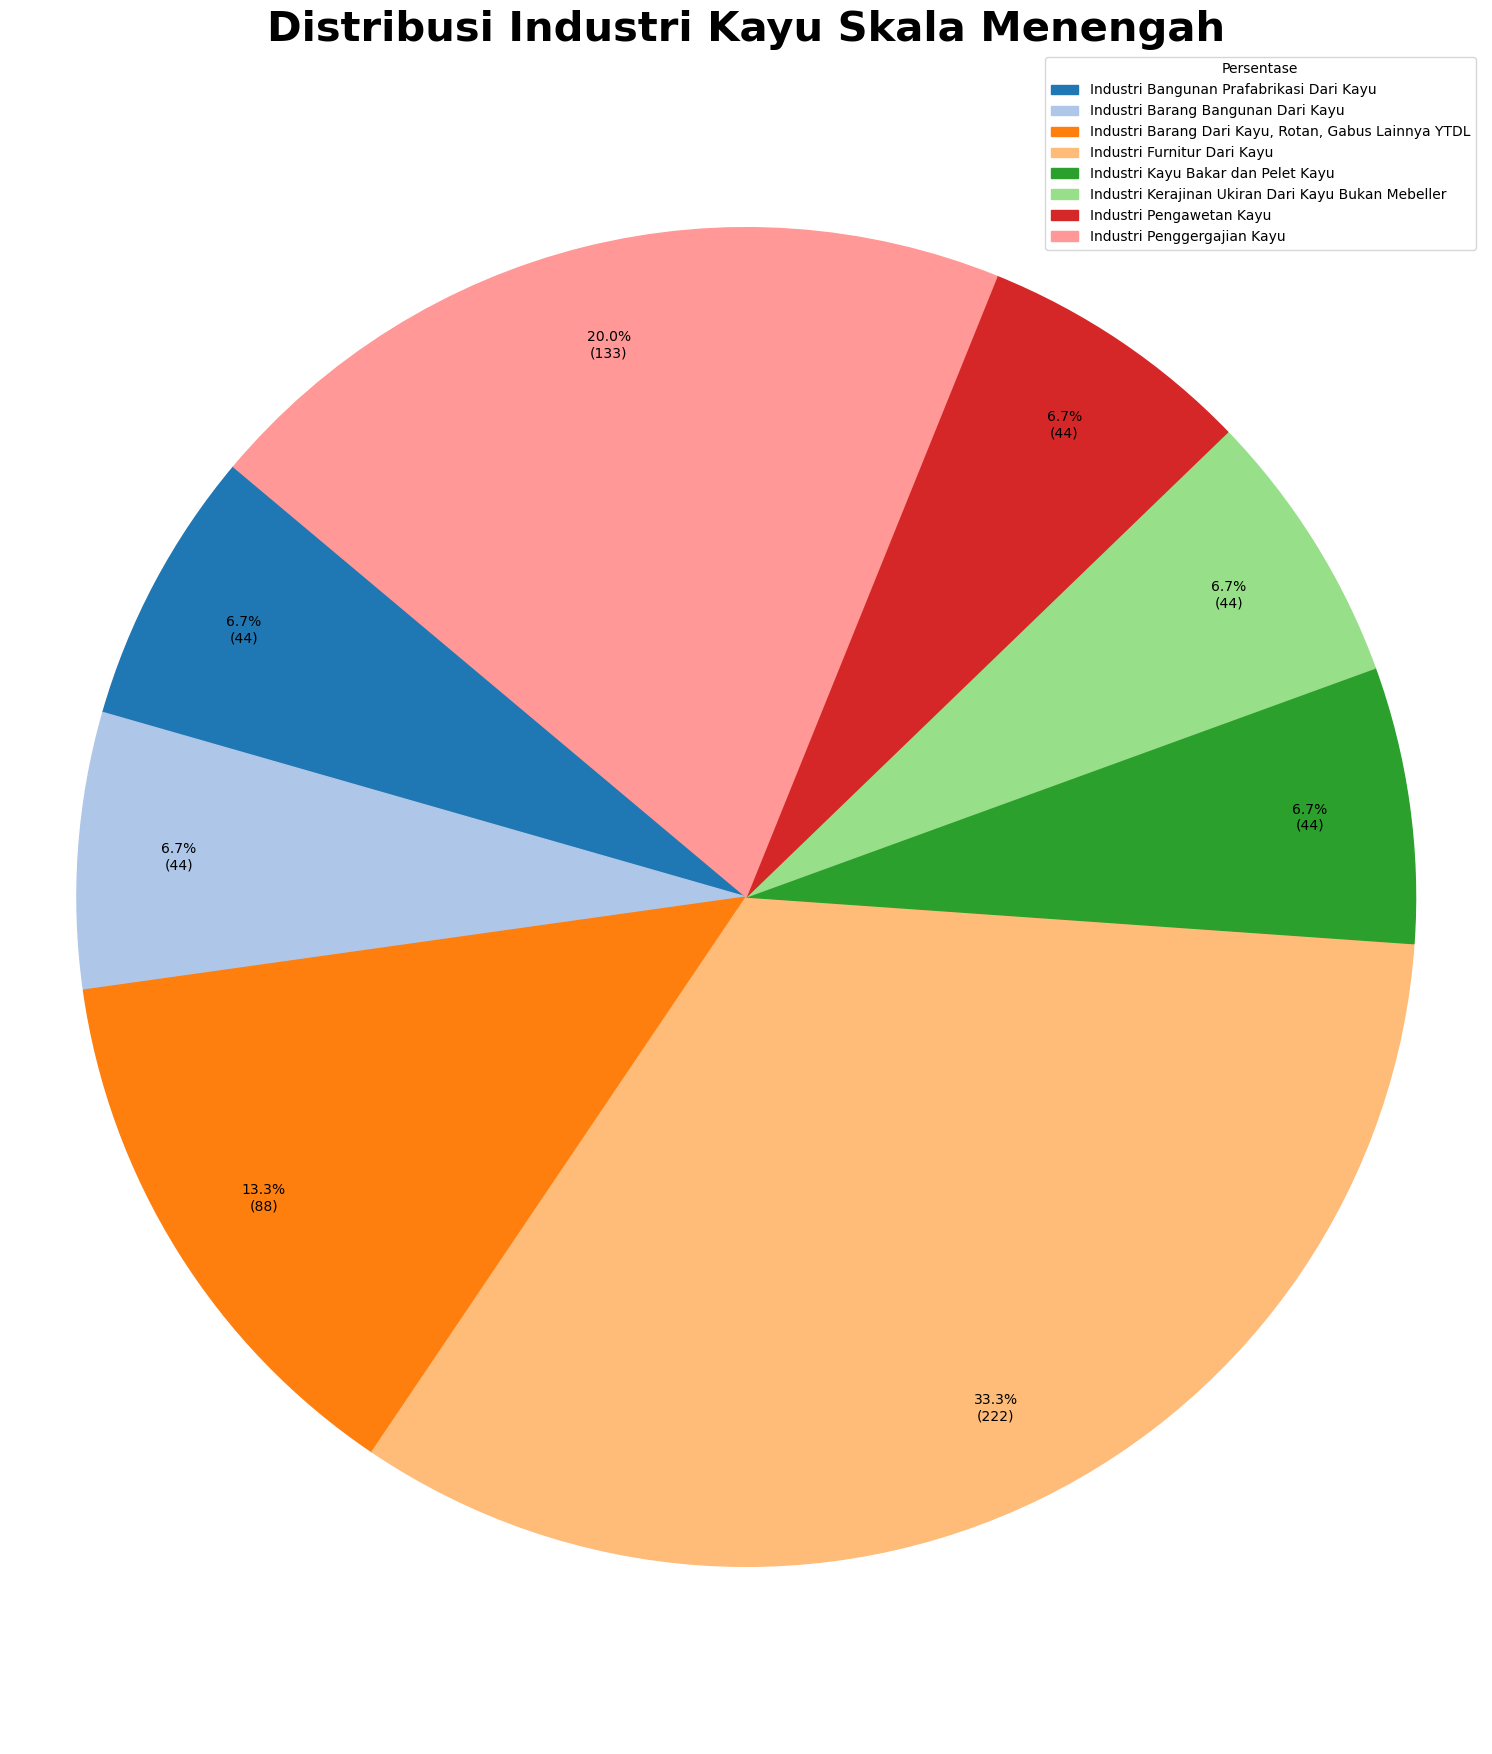

In [7]:
import matplotlib.pyplot as plt
from itertools import cycle

# Data
labels = ['Industri Bangunan Prafabrikasi Dari Kayu', 'Industri Barang Bangunan Dari Kayu', 'Industri Barang Dari Kayu, Rotan, Gabus Lainnya YTDL', 'Industri Furnitur Dari Kayu', 'Industri Kayu Bakar dan Pelet Kayu', 'Industri Kerajinan Ukiran Dari Kayu Bukan Mebeller', 'Industri Pengawetan Kayu', 'Industri Penggergajian Kayu']
sizes = [1, 1, 2, 5, 1, 1, 1, 3]

# Plot
fig, ax = plt.subplots(figsize=(19, 22))
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=lambda pct: '{:.1f}%\n({})'.format(pct, int(pct/sum(sizes) * 100)), pctdistance=0.85, startangle=140, textprops=dict(color="black"))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Define color cycle
colors = cycle(plt.cm.tab20.colors)

# Set different color for each wedge
for wedge in wedges:
    wedge.set_color(next(colors))

# Add count next to percentage
plt.legend(wedges, labels, title="Persentase", loc="best")

plt.title('Distribusi Industri Kayu Skala Menengah', loc='center', fontsize=30, fontweight='bold')

# Menyimpan diagram pie sebagai file gambar
plt.savefig('kayu skala menengah.png', dpi=300, bbox_inches='tight')

plt.show()

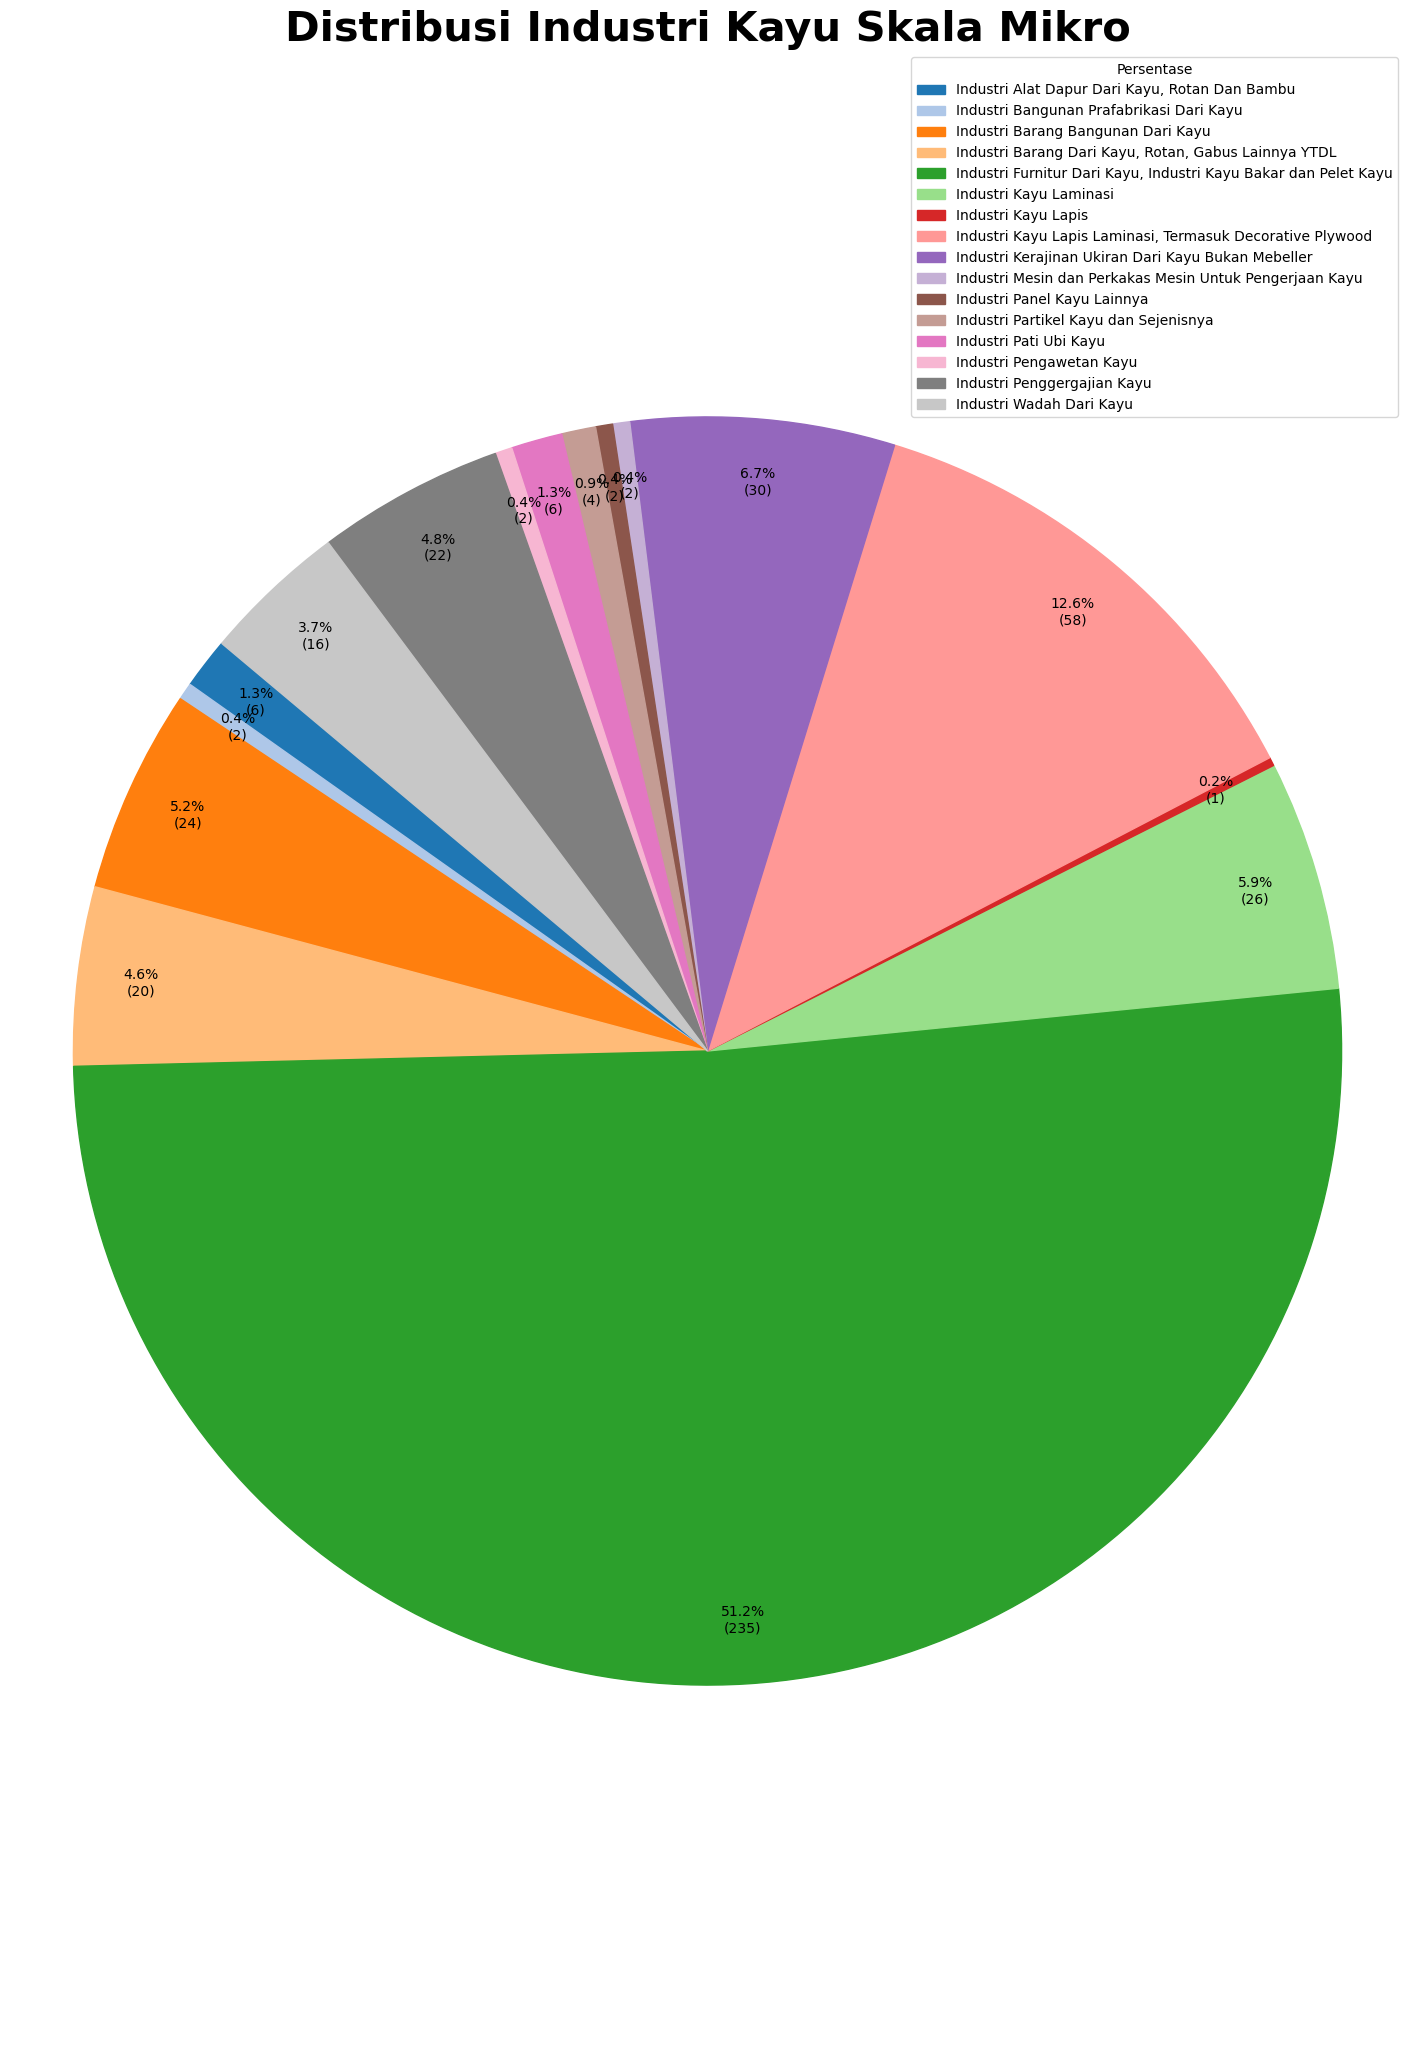

In [63]:
import matplotlib.pyplot as plt
from itertools import cycle

# Data
labels = ['Industri Alat Dapur Dari Kayu, Rotan Dan Bambu', 'Industri Bangunan Prafabrikasi Dari Kayu', 'Industri Barang Bangunan Dari Kayu', 'Industri Barang Dari Kayu, Rotan, Gabus Lainnya YTDL', 'Industri Furnitur Dari Kayu, Industri Kayu Bakar dan Pelet Kayu', 'Industri Kayu Laminasi', 'Industri Kayu Lapis', 'Industri Kayu Lapis Laminasi, Termasuk Decorative Plywood', 'Industri Kerajinan Ukiran Dari Kayu Bukan Mebeller', 'Industri Mesin dan Perkakas Mesin Untuk Pengerjaan Kayu', 'Industri Panel Kayu Lainnya', 'Industri Partikel Kayu dan Sejenisnya', 'Industri Pati Ubi Kayu', 'Industri Pengawetan Kayu', 'Industri Penggergajian Kayu', 'Industri Wadah Dari Kayu']
sizes = [6, 2, 24, 21, 236, 27, 1, 58, 31, 2, 2, 4, 6, 2, 22, 17]

# Plot
fig, ax = plt.subplots(figsize=(18, 26))
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=lambda pct: '{:.1f}%\n({})'.format(pct, int(pct/100 * sum(sizes))), pctdistance=0.90, startangle=140, textprops=dict(color="black"))
#patches, texts, autotexts = plt.pie(sizes, colors=colors, startangle=140, autopct='%1.1f%%', pctdistance=0.85)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Define color cycle
colors = cycle(plt.cm.tab20.colors)

# Set different color for each wedge
for wedge in wedges:
    wedge.set_color(next(colors))

# Add count next to percentage
plt.legend(wedges, labels, title="Persentase", loc="best")

plt.title('Distribusi Industri Kayu Skala Mikro', loc='center', fontsize=30, fontweight='bold')

# Menyimpan diagram pie sebagai file gambar
plt.savefig('kayu skala mikro.png', dpi=300, bbox_inches='tight')

plt.show()

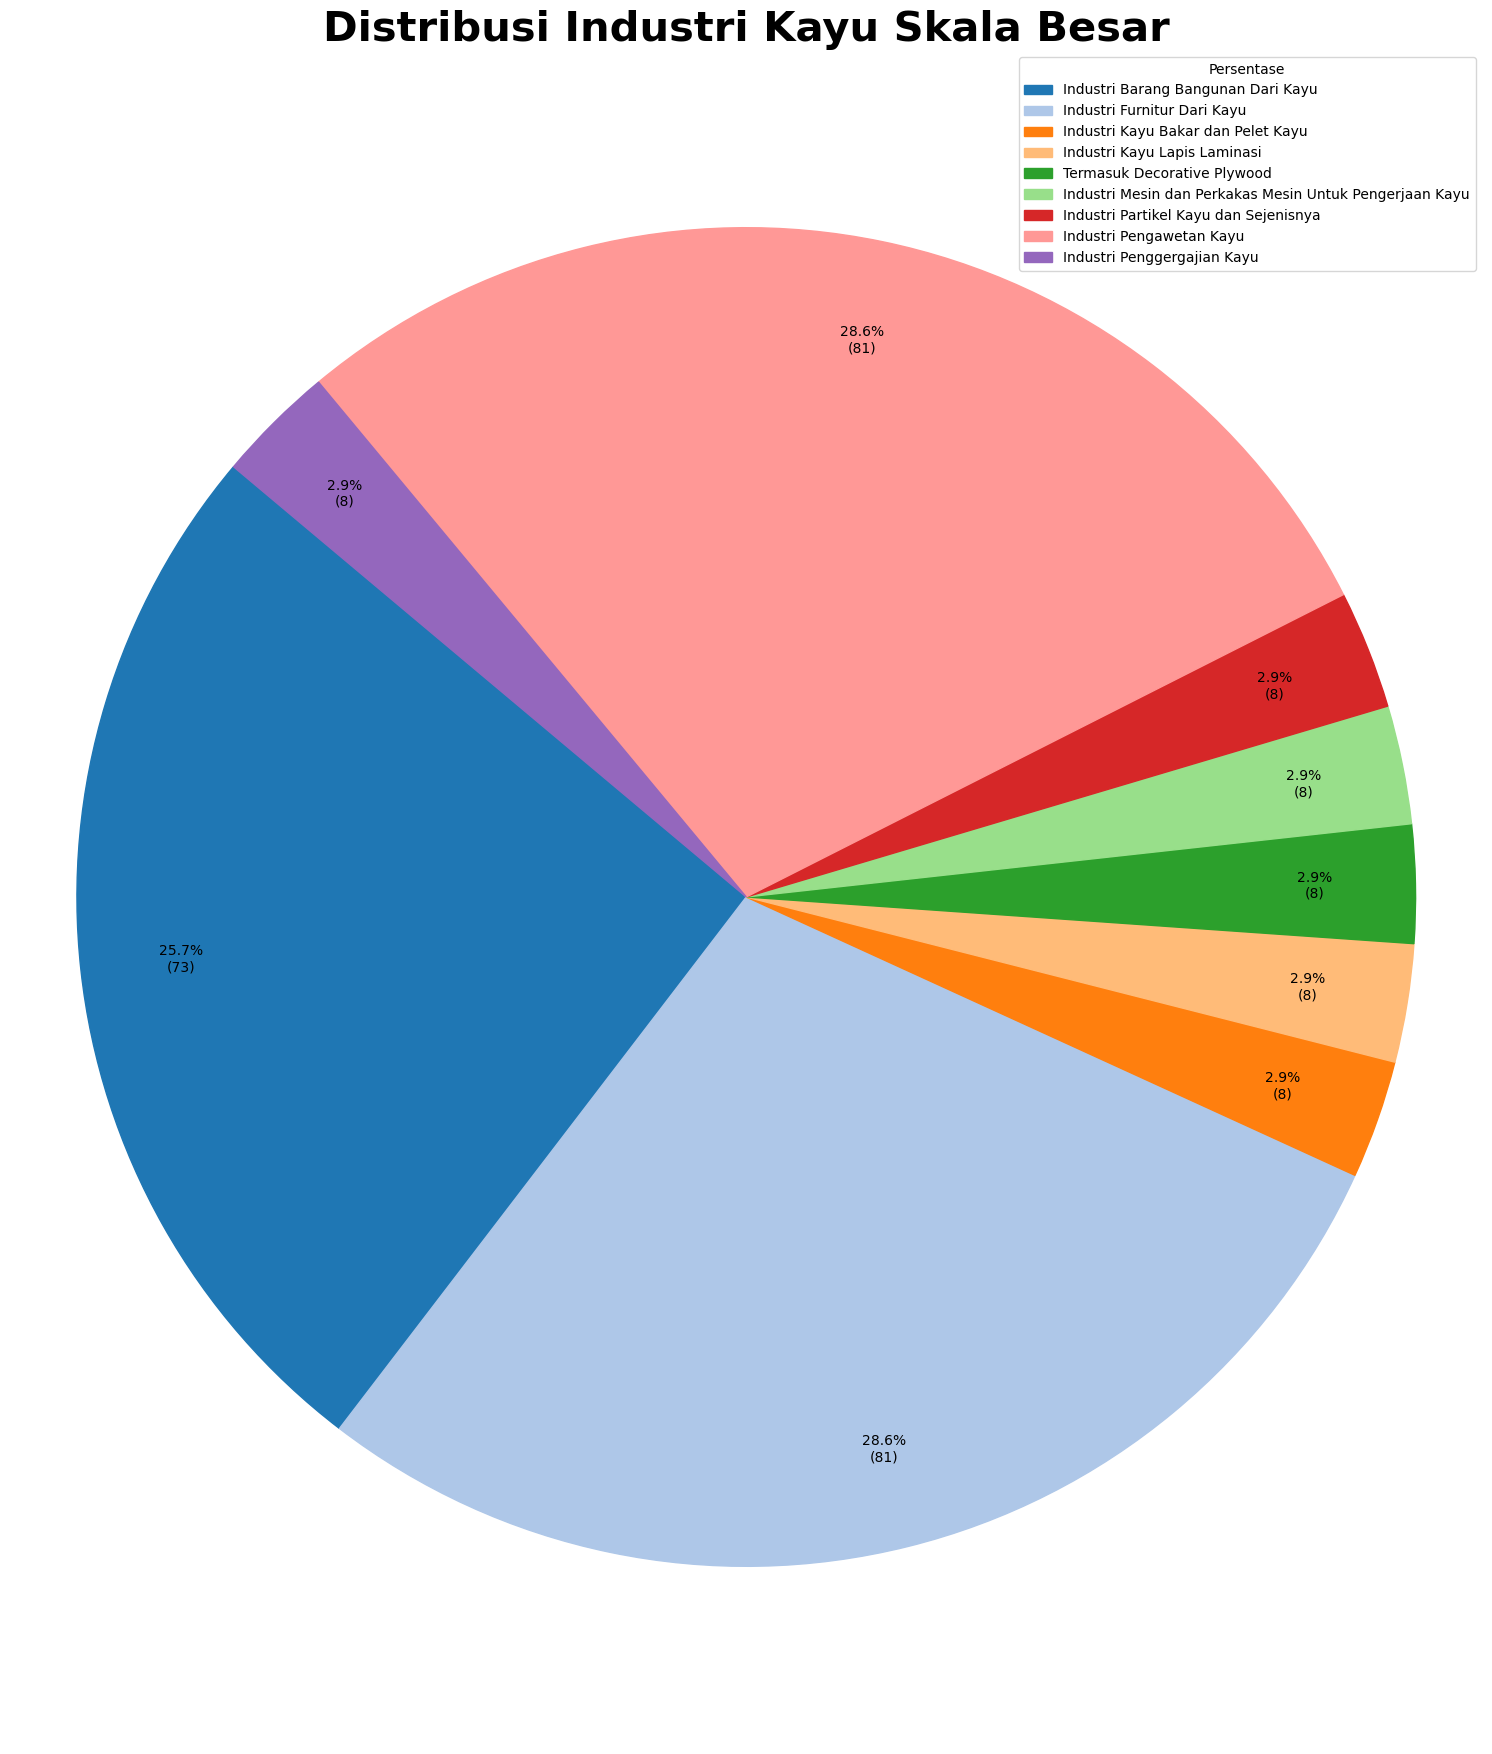

In [9]:
import matplotlib.pyplot as plt
from itertools import cycle

# Data
labels = ['Industri Barang Bangunan Dari Kayu ', 'Industri Furnitur Dari Kayu', 'Industri Kayu Bakar dan Pelet Kayu' , 'Industri Kayu Lapis Laminasi' , 'Termasuk Decorative Plywood', 
'Industri Mesin dan Perkakas Mesin Untuk Pengerjaan Kayu', 'Industri Partikel Kayu dan Sejenisnya', 'Industri Pengawetan Kayu', 'Industri Penggergajian Kayu', 'Industri Wadah Dari Kayu']
sizes = [9, 10, 1, 1, 1, 1, 1, 10, 1]

# Plot
fig, ax = plt.subplots(figsize=(19, 22))
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=lambda pct: '{:.1f}%\n({})'.format(pct, int(pct/sum(sizes) * 100)), pctdistance=0.85, startangle=140, textprops=dict(color="black"))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Define color cycle
colors = cycle(plt.cm.tab20.colors)

# Set different color for each wedge
for wedge in wedges:
    wedge.set_color(next(colors))

# Add count next to percentage
plt.legend(wedges, labels, title="Persentase", loc="best")

plt.title('Distribusi Industri Kayu Skala Besar', loc='center', fontsize=30, fontweight='bold')

# Menyimpan diagram pie sebagai file gambar
plt.savefig('kayu skala besar.png', dpi=300, bbox_inches='tight')

plt.show()

In [10]:
df = pd.read_excel("Data Industri.xlsx")

In [ ]:
df.head(100)

In [ ]:
df.describe()

In [13]:
df.columns

Index(['No.', 'Nib', 'Npwp Perusahaan', 'Nama Perusahaan',
       'Uraian Status Penanaman Modal', 'Uraian Jenis Perusahaan',
       'Uraian Risiko Proyek', 'nama_proyek', 'Uraian Skala Usaha',
       'Alamat Usaha', 'kecamatan_usaha', 'kelurahan_usaha', 'longitude',
       'latitude', 'Kbli', 'Judul Kbli', 'KL/Sektor Pembina', 'Nama User',
       'Nomor Identitas User', 'Email', 'Nomor Telp', 'luas_tanah',
       'satuan_tanah', 'Jumlah Investasi', 'TKI'],
      dtype='object')

In [ ]:
# List kolom yang ingin dihapus
kolom_dihapus = ['longitude',	'latitude', 'Npwp Perusahaan', 'Uraian Status Penanaman Modal', 
                 'Alamat Usaha', 'kecamatan_usaha', 'kelurahan_usaha', 
                 'KL/Sektor Pembina', 'Nama User', 'Nomor Identitas User', 
                 'Email', 'Nomor Telp', 'luas_tanah', 'satuan_tanah']

# Menghapus kolom-kolom tersebut dari dataframe
df1= df.drop(kolom_dihapus, axis=1)

df1

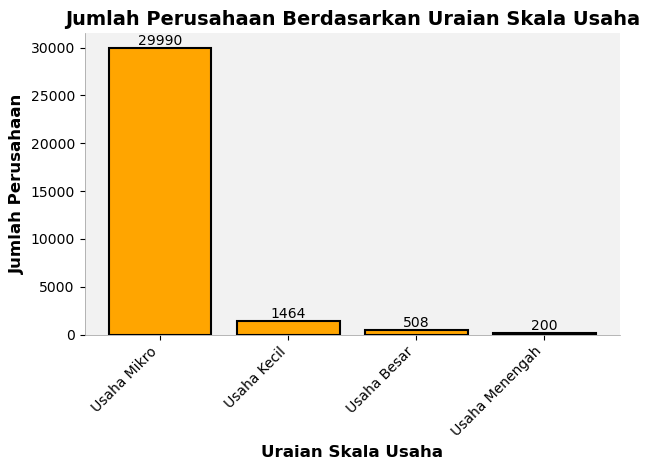

In [15]:
import matplotlib.pyplot as plt

# Data jumlah perusahaan berdasarkan Uraian Skala Usaha
jumlah_perusahaan_skala = df1['Uraian Skala Usaha'].value_counts()

# Mengubah warna menjadi oranye dan menambahkan efek bayangan
plt.bar(jumlah_perusahaan_skala.index, jumlah_perusahaan_skala.values, color='orange', edgecolor='k', linewidth=1.5)

# Menambahkan jumlah di atas setiap batang
for i in range(len(jumlah_perusahaan_skala)):
    plt.text(i, jumlah_perusahaan_skala.values[i]+5, str(jumlah_perusahaan_skala.values[i]), ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Perusahaan Berdasarkan Uraian Skala Usaha', fontsize=14, fontweight='bold')
plt.xlabel('Uraian Skala Usaha', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Perusahaan', fontsize=12, fontweight='bold')

# Merenggangkan jarak antar kata pada sumbu x
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mengatur warna latar belakang plot
plt.gca().set_facecolor('#f2f2f2')

# Menghilangkan garis tepi atas dan kanan
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mengatur lebar garis tepi kiri dan bawah
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Mengatur warna garis tepi kiri dan bawah
plt.gca().spines['left'].set_color('#999999')
plt.gca().spines['bottom'].set_color('#999999')

# Menampilkan diagram
plt.tight_layout()
plt.show()

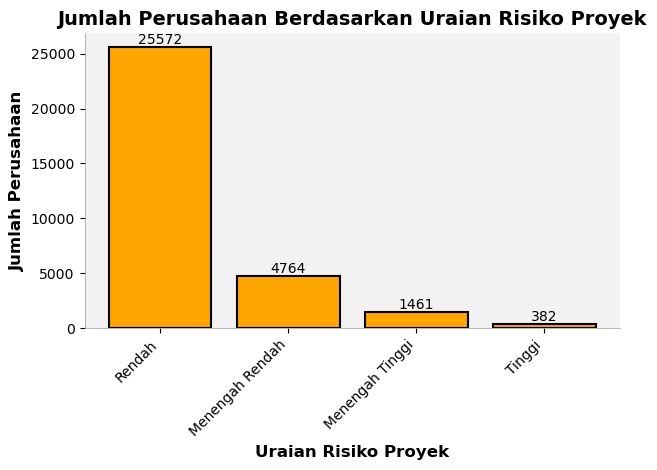

In [16]:
import matplotlib.pyplot as plt

# Data jumlah perusahaan berdasarkan Uraian Skala Usaha
jumlah_perusahaan_skala = df1['Uraian Risiko Proyek'].value_counts()

# Mengubah warna menjadi oranye dan menambahkan efek bayangan
plt.bar(jumlah_perusahaan_skala.index, jumlah_perusahaan_skala.values, color='orange', edgecolor='k', linewidth=1.5)

# Menambahkan jumlah di atas setiap batang
for i in range(len(jumlah_perusahaan_skala)):
    plt.text(i, jumlah_perusahaan_skala.values[i]+5, str(jumlah_perusahaan_skala.values[i]), ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Perusahaan Berdasarkan Uraian Risiko Proyek', fontsize=14, fontweight='bold')
plt.xlabel('Uraian Risiko Proyek', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Perusahaan', fontsize=12, fontweight='bold')

# Merenggangkan jarak antar kata pada sumbu x
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mengatur warna latar belakang plot
plt.gca().set_facecolor('#f2f2f2')

# Menghilangkan garis tepi atas dan kanan
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mengatur lebar garis tepi kiri dan bawah
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Mengatur warna garis tepi kiri dan bawah
plt.gca().spines['left'].set_color('#999999')
plt.gca().spines['bottom'].set_color('#999999')

# Menampilkan diagram
plt.tight_layout()
plt.show()

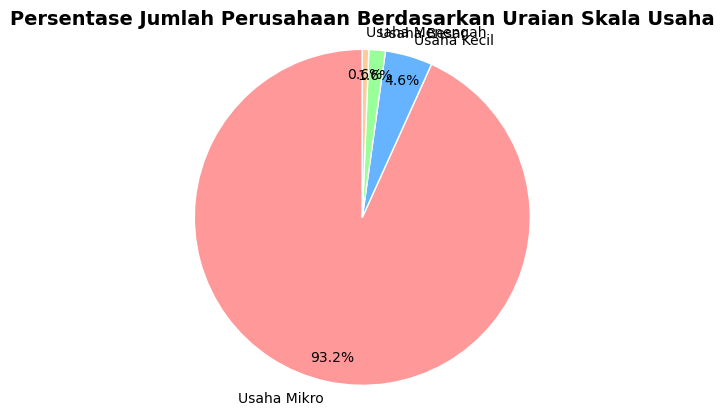

In [17]:
# Data jumlah perusahaan berdasarkan Uraian Skala Usaha
jumlah_perusahaan_skala = df1['Uraian Skala Usaha'].value_counts()

# Warna yang akan digunakan pada diagram pie
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Membuat diagram pie
plt.pie(jumlah_perusahaan_skala, labels=jumlah_perusahaan_skala.index, autopct='%1.1f%%', pctdistance=0.85, colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})

# Menambahkan judul dan gaya
plt.title('Persentase Jumlah Perusahaan Berdasarkan Uraian Skala Usaha', fontsize=14, fontweight='bold')

# Membuat lingkaran berbentuk bulat
plt.axis('equal')

# Menampilkan diagram
plt.show()


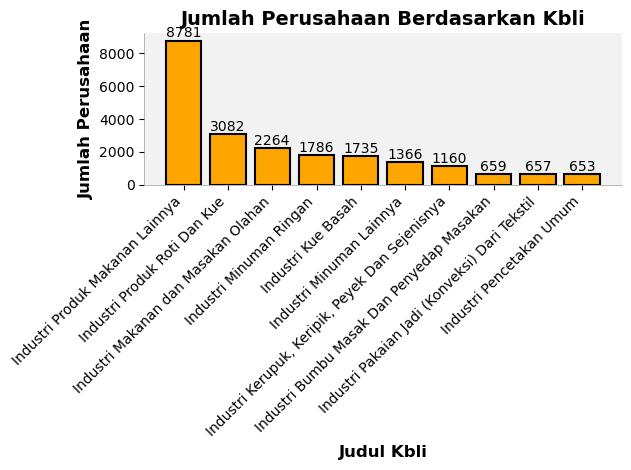

In [18]:
# Mengambil top  kategori teratas
top_kategori = df1['Judul Kbli'].value_counts().nlargest(10)

# Mengubah warna menjadi oranye dan menambahkan efek bayangan
plt.bar(top_kategori.index, top_kategori.values, color='orange', edgecolor='k', linewidth=1.5)

# Menambahkan jumlah di atas setiap batang
for i in range(len(top_kategori)):
    plt.text(i, top_kategori.values[i]+5, str(top_kategori.values[i]), ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Perusahaan Berdasarkan Kbli', fontsize=14, fontweight='bold')
plt.xlabel('Judul Kbli', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Perusahaan', fontsize=12, fontweight='bold')

# Mengatur warna latar belakang plot
plt.gca().set_facecolor('#f2f2f2')

# Menghilangkan garis tepi atas dan kanan
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mengatur lebar garis tepi kiri dan bawah
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Mengatur warna garis tepi kiri dan bawah
plt.gca().spines['left'].set_color('#999999')
plt.gca().spines['bottom'].set_color('#999999')

# Menampilkan diagram
plt.xticks(rotation=45, ha='right')  # Merotasi label dan menempatkannya ke kanan agar lebih mudah dibaca
plt.tight_layout()
plt.show()


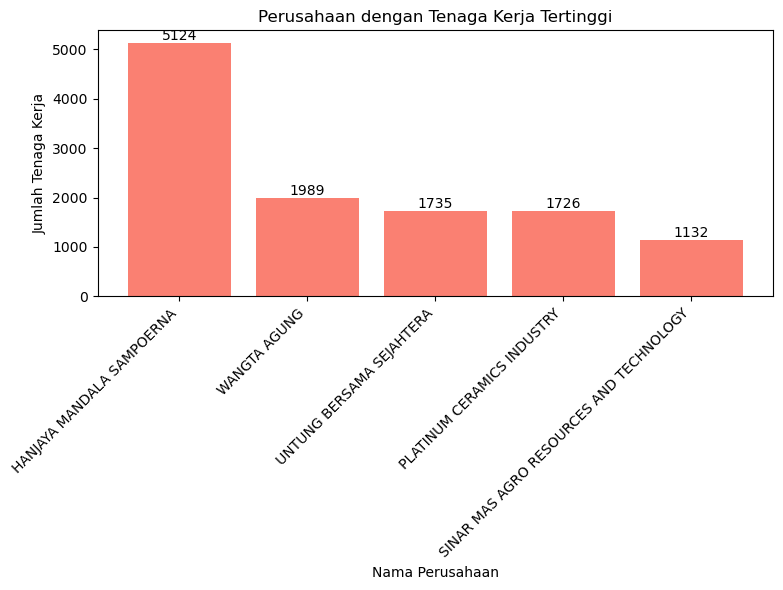

In [19]:
import matplotlib.pyplot as plt

# Data perusahaan dengan tenaga kerja tertinggi
perusahaan_tki_tertinggi = df1.nlargest(5, 'TKI')

# Membuat subplot
plt.figure(figsize=(8, 6))

# Subplot untuk tenaga kerja tertinggi
bars = plt.bar(perusahaan_tki_tertinggi['Nama Perusahaan'], perusahaan_tki_tertinggi['TKI'], color='salmon')

# Menambahkan nilai di atas diagram batang hanya untuk TKI
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Perusahaan dengan Tenaga Kerja Tertinggi')
plt.xlabel('Nama Perusahaan')
plt.ylabel('Jumlah Tenaga Kerja')
plt.xticks(rotation=45, ha='right')

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan visualisasi
plt.show()


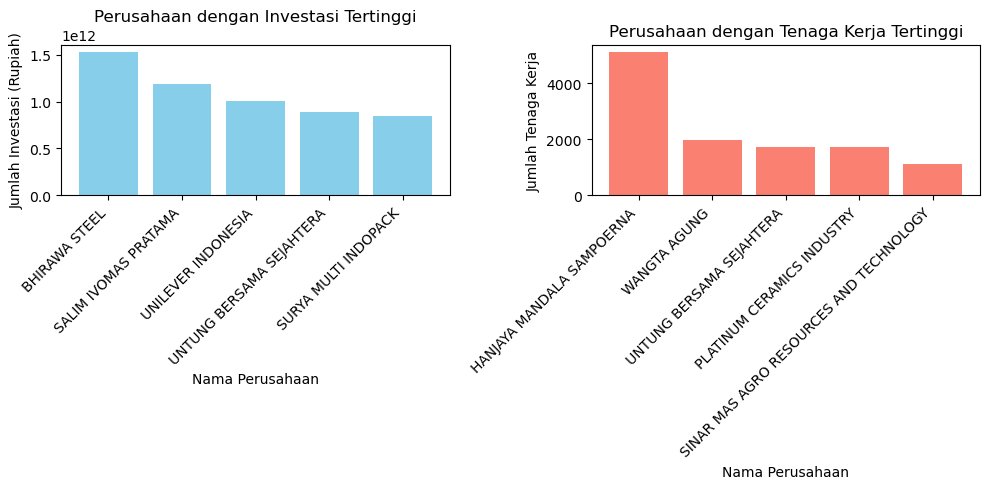

In [20]:
# Data perusahaan dengan investasi tertinggi
perusahaan_investasi_tertinggi = df1.nlargest(5, 'Jumlah Investasi')

# Data perusahaan dengan tenaga kerja tertinggi
perusahaan_tki_tertinggi = df1.nlargest(5, 'TKI')

# Membuat subplot
plt.figure(figsize=(10, 5))

# Subplot untuk investasi tertinggi
plt.subplot(1, 2, 1)
plt.bar(perusahaan_investasi_tertinggi['Nama Perusahaan'], perusahaan_investasi_tertinggi['Jumlah Investasi'], color='skyblue')
plt.title('Perusahaan dengan Investasi Tertinggi')
plt.xlabel('Nama Perusahaan')
plt.ylabel('Jumlah Investasi (Rupiah)')
plt.xticks(rotation=45, ha='right')

# Subplot untuk tenaga kerja tertinggi
plt.subplot(1, 2, 2)
plt.bar(perusahaan_tki_tertinggi['Nama Perusahaan'], perusahaan_tki_tertinggi['TKI'], color='salmon')
plt.title('Perusahaan dengan Tenaga Kerja Tertinggi')
plt.xlabel('Nama Perusahaan')
plt.ylabel('Jumlah Tenaga Kerja')
plt.xticks(rotation=45, ha='right')

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan visualisasi
plt.show()


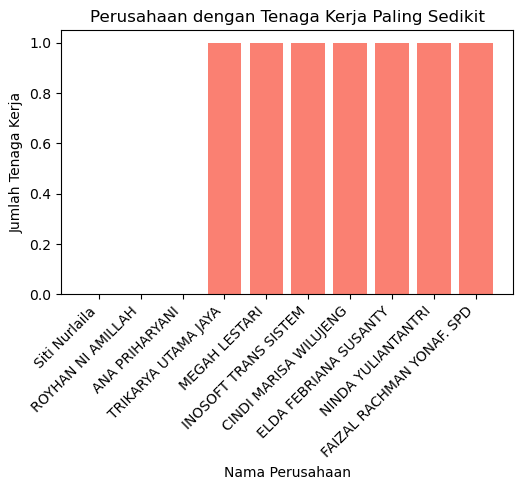

In [21]:
# Data perusahaan dengan tenaga kerja tertinggi
perusahaan_tki_tertinggi = df1.nsmallest(10, 'TKI')

# Membuat subplot
plt.figure(figsize=(10, 5))

# Subplot untuk tenaga kerja tertinggi
plt.subplot(1, 2, 2)
plt.bar(perusahaan_tki_tertinggi['Nama Perusahaan'], perusahaan_tki_tertinggi['TKI'], color='salmon')
plt.title('Perusahaan dengan Tenaga Kerja Paling Sedikit')
plt.xlabel('Nama Perusahaan')
plt.ylabel('Jumlah Tenaga Kerja')
plt.xticks(rotation=45, ha='right')

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan visualisasi
plt.show()


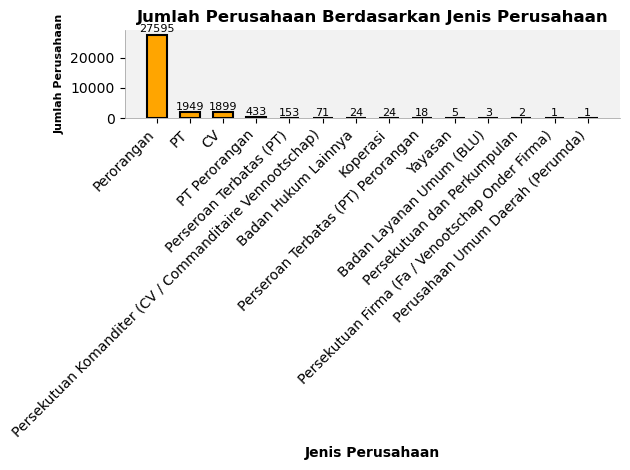

In [22]:
import matplotlib.pyplot as plt

# Mengambil top kategori teratas
top_kategori = df1['Uraian Jenis Perusahaan'].value_counts()

# Mengatur lebar bar agar tidak tumpang tindih
width = 0.6

# Mengatur ruang antara setiap kategori
space = 0.6

# Mengubah warna menjadi oranye dan menambahkan efek bayangan
plt.bar(top_kategori.index, top_kategori.values, width=width, color='orange', edgecolor='k', linewidth=1.5)

# Menambahkan jumlah di atas setiap bar
for i in range(len(top_kategori)):
    plt.text(i, top_kategori.values[i]+5, str(top_kategori.values[i]), ha='center', va='bottom', fontsize=8)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Perusahaan Berdasarkan Jenis Perusahaan', fontsize=12, fontweight='bold')
plt.xlabel('Jenis Perusahaan', fontsize=10, fontweight='bold')
plt.ylabel('Jumlah Perusahaan', fontsize=8, fontweight='bold')

# Mengatur warna latar belakang plot
plt.gca().set_facecolor('#f2f2f2')

# Menghilangkan garis tepi atas dan kanan
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mengatur lebar garis tepi kiri dan bawah
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Mengatur warna garis tepi kiri dan bawah
plt.gca().spines['left'].set_color('#999999')
plt.gca().spines['bottom'].set_color('#999999')

# Menampilkan diagram
plt.xticks(rotation=45, ha='right')  # Merotasi label dan menempatkannya ke kanan agar lebih mudah dibaca
plt.tight_layout()
plt.show()


In [ ]:
# Menghapus baris dengan nilai "Besar" pada kolom "Uraian Skala Usaha"
df_filtered = df1[df1['Uraian Skala Usaha'] != 'Usaha Besar']

df_filtered

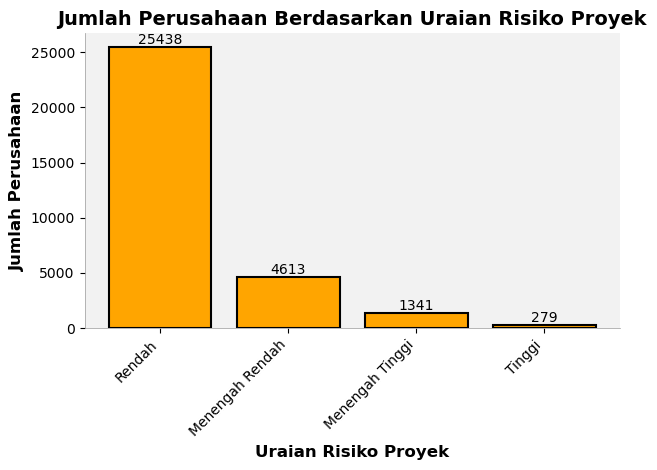

In [24]:
df2= df_filtered
# Data jumlah perusahaan berdasarkan Uraian Skala Usaha
jumlah_perusahaan_skala = df2['Uraian Risiko Proyek'].value_counts()

# Mengubah warna menjadi oranye dan menambahkan efek bayangan
plt.bar(jumlah_perusahaan_skala.index, jumlah_perusahaan_skala.values, color='orange', edgecolor='k', linewidth=1.5)

# Menambahkan jumlah di atas setiap batang
for i in range(len(jumlah_perusahaan_skala)):
    plt.text(i, jumlah_perusahaan_skala.values[i]+5, str(jumlah_perusahaan_skala.values[i]), ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Perusahaan Berdasarkan Uraian Risiko Proyek', fontsize=14, fontweight='bold')
plt.xlabel('Uraian Risiko Proyek', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Perusahaan', fontsize=12, fontweight='bold')

# Merenggangkan jarak antar kata pada sumbu x
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mengatur warna latar belakang plot
plt.gca().set_facecolor('#f2f2f2')

# Menghilangkan garis tepi atas dan kanan
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mengatur lebar garis tepi kiri dan bawah
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Mengatur warna garis tepi kiri dan bawah
plt.gca().spines['left'].set_color('#999999')
plt.gca().spines['bottom'].set_color('#999999')

# Menampilkan diagram
plt.tight_layout()
plt.show()

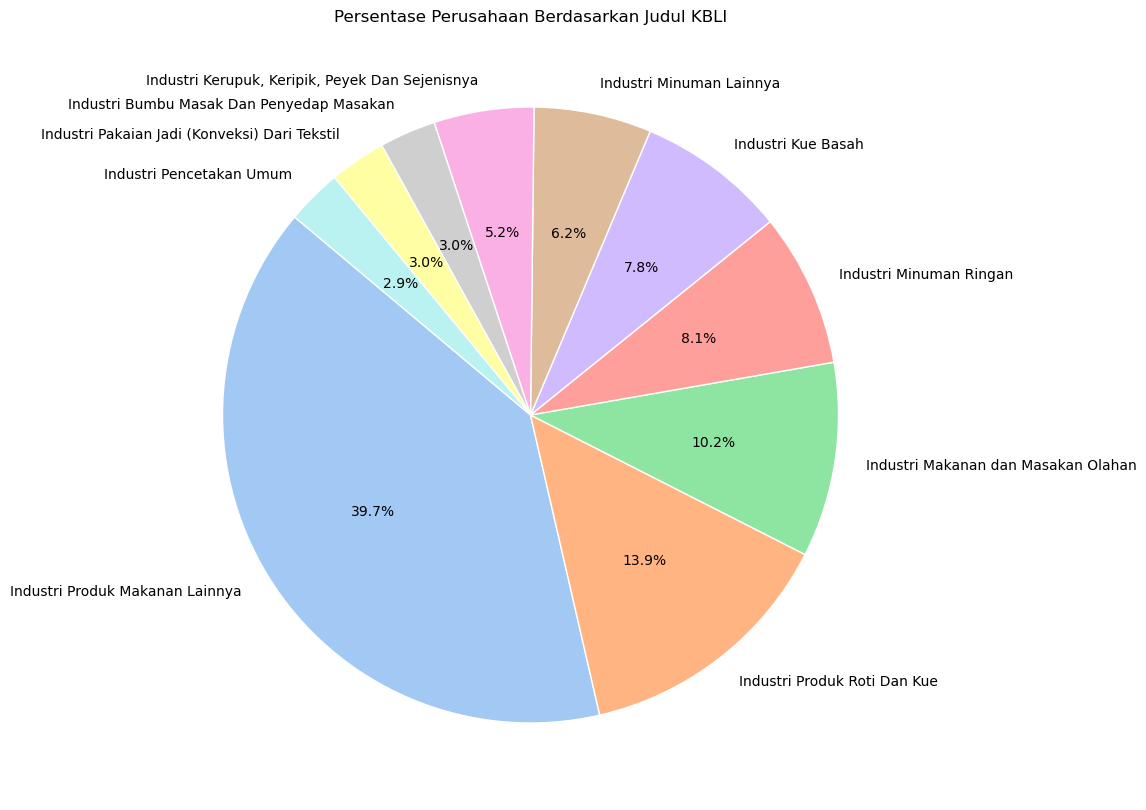

In [25]:
# Menghitung jumlah perusahaan berdasarkan judul KBLI
jumlah_perusahaan = df_filtered['Judul Kbli'].value_counts().nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(10, 10))
plt.pie(jumlah_perusahaan, labels=jumlah_perusahaan.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})
plt.title('Persentase Perusahaan Berdasarkan Judul KBLI')

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

plt.show()

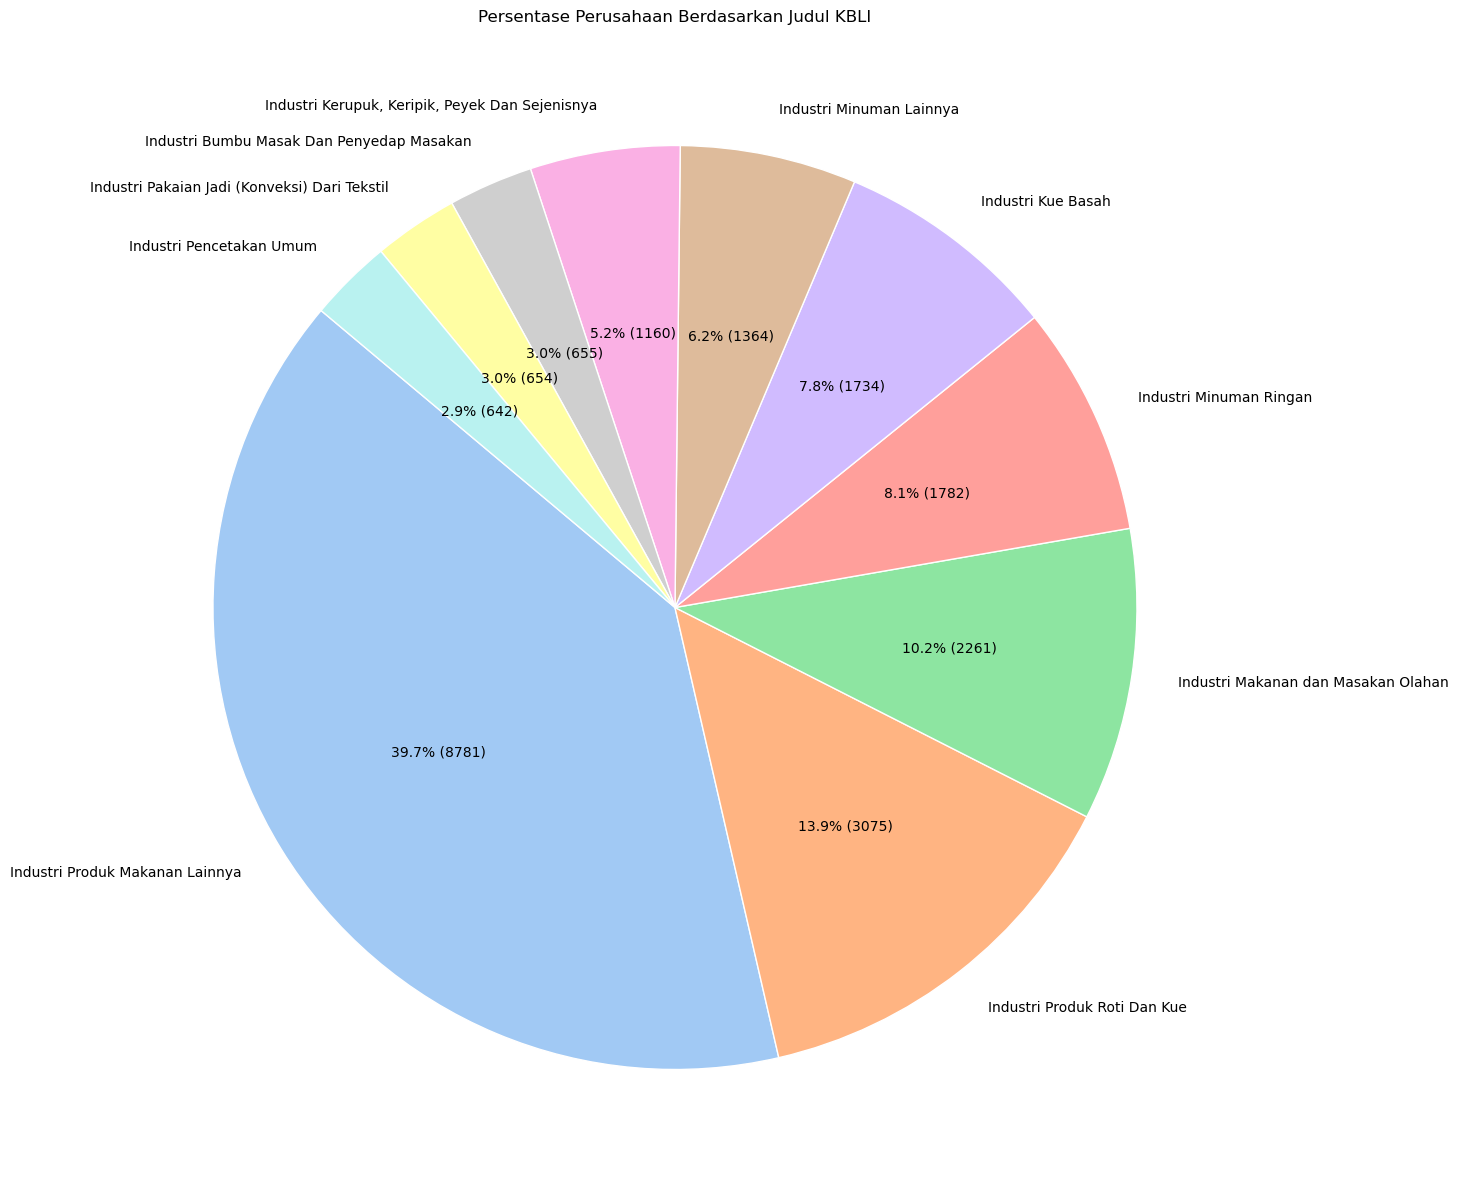

In [26]:
# Menghitung jumlah perusahaan berdasarkan judul KBLI
jumlah_perusahaan = df_filtered['Judul Kbli'].value_counts().nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(15, 15))
wedges, texts, autotexts = plt.pie(jumlah_perusahaan, labels=jumlah_perusahaan.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})

# Menambahkan nilai jumlah perusahaan pada masing-masing warna judul KBLI di diagram pie
for i, (autotext, label) in enumerate(zip(autotexts, jumlah_perusahaan.index)):
    autotext.set_text(f'{autotext.get_text()} ({jumlah_perusahaan[label]})')

plt.title('Persentase Perusahaan Berdasarkan Judul KBLI')

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

plt.show()

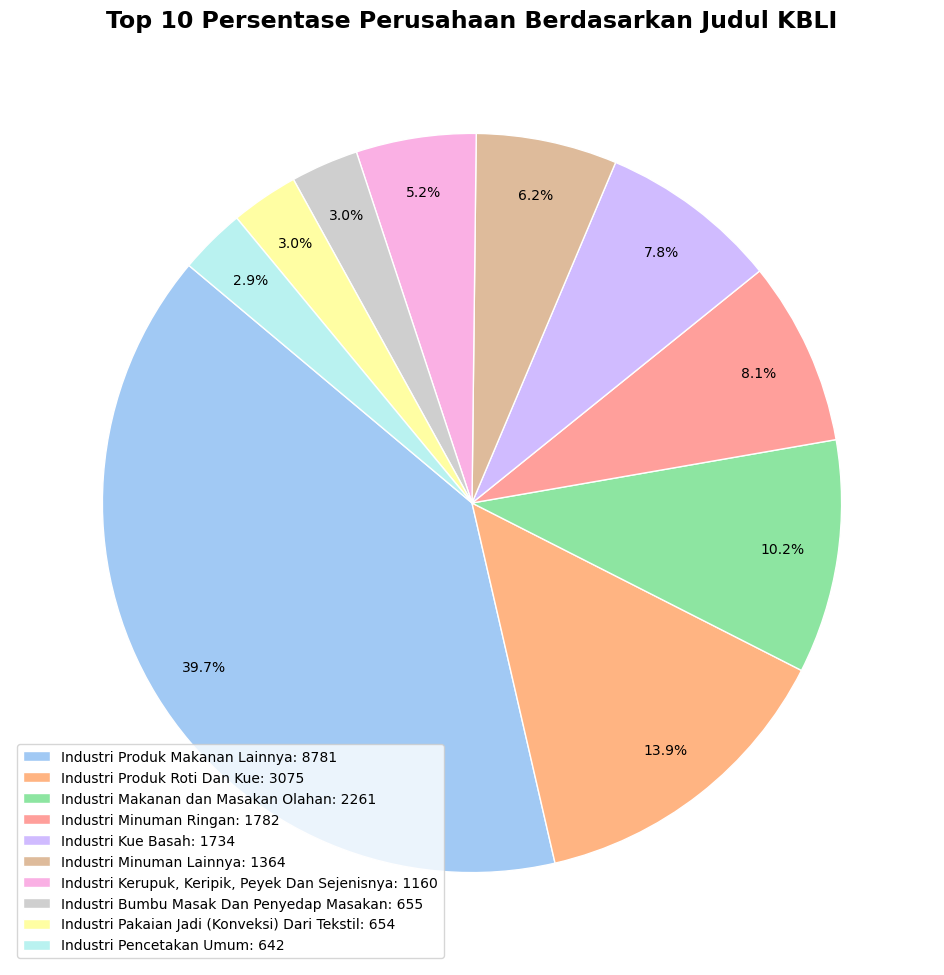

In [27]:
# Menghitung jumlah perusahaan berdasarkan judul KBLI
jumlah_perusahaan = df_filtered['Judul Kbli'].value_counts().nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(12, 12))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.85)

# Mengatur keterangan warna dengan judul KBLI dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Perusahaan Berdasarkan Judul KBLI', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

plt.show()

In [28]:
# Menyimpan diagram sebagai gambar
plt.savefig('pie_chart.png')

<Figure size 640x480 with 0 Axes>

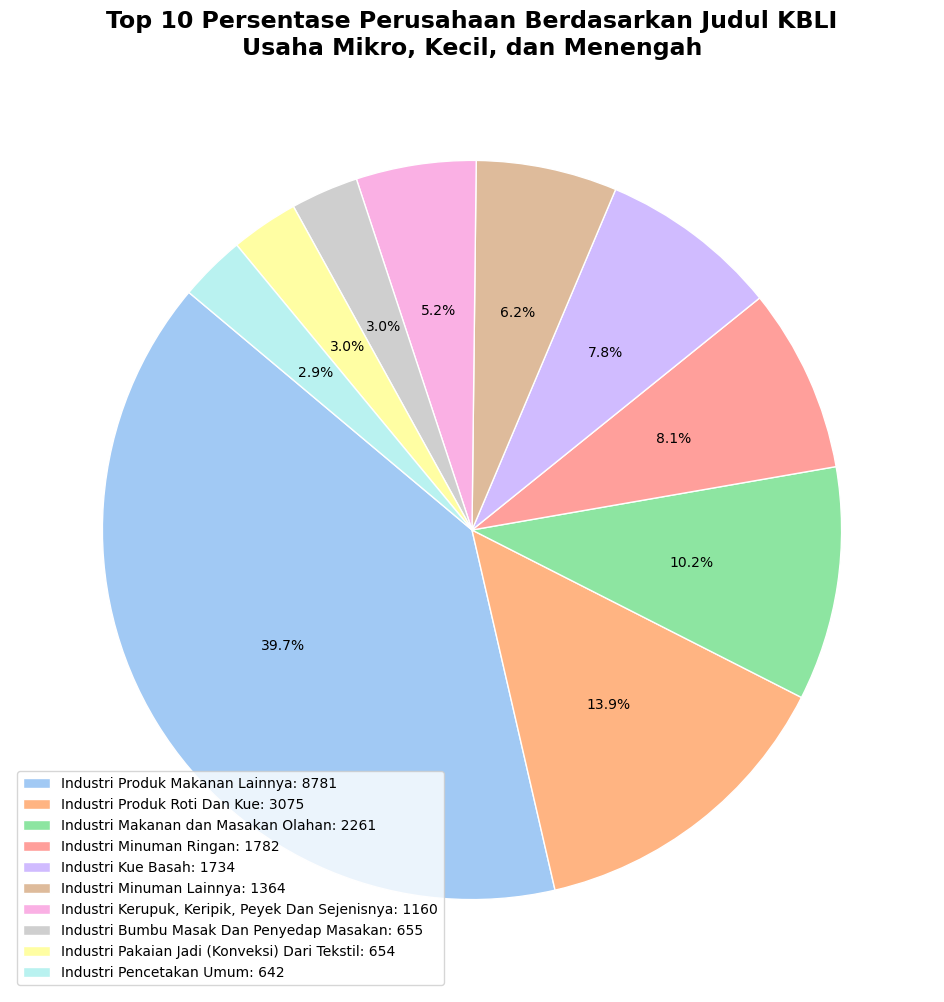

In [29]:
# Menghitung jumlah perusahaan berdasarkan judul KBLI
jumlah_perusahaan = df_filtered['Judul Kbli'].value_counts().nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(12, 12))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan judul KBLI dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Perusahaan Berdasarkan Judul KBLI\nUsaha Mikro, Kecil, dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram_pie.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Menghapus baris dengan nilai "Besar" pada kolom "Uraian Skala Usaha"
df_filtered1 = df_filtered[df_filtered['Uraian Skala Usaha'] != 'Usaha Mikro']

df_filtered1

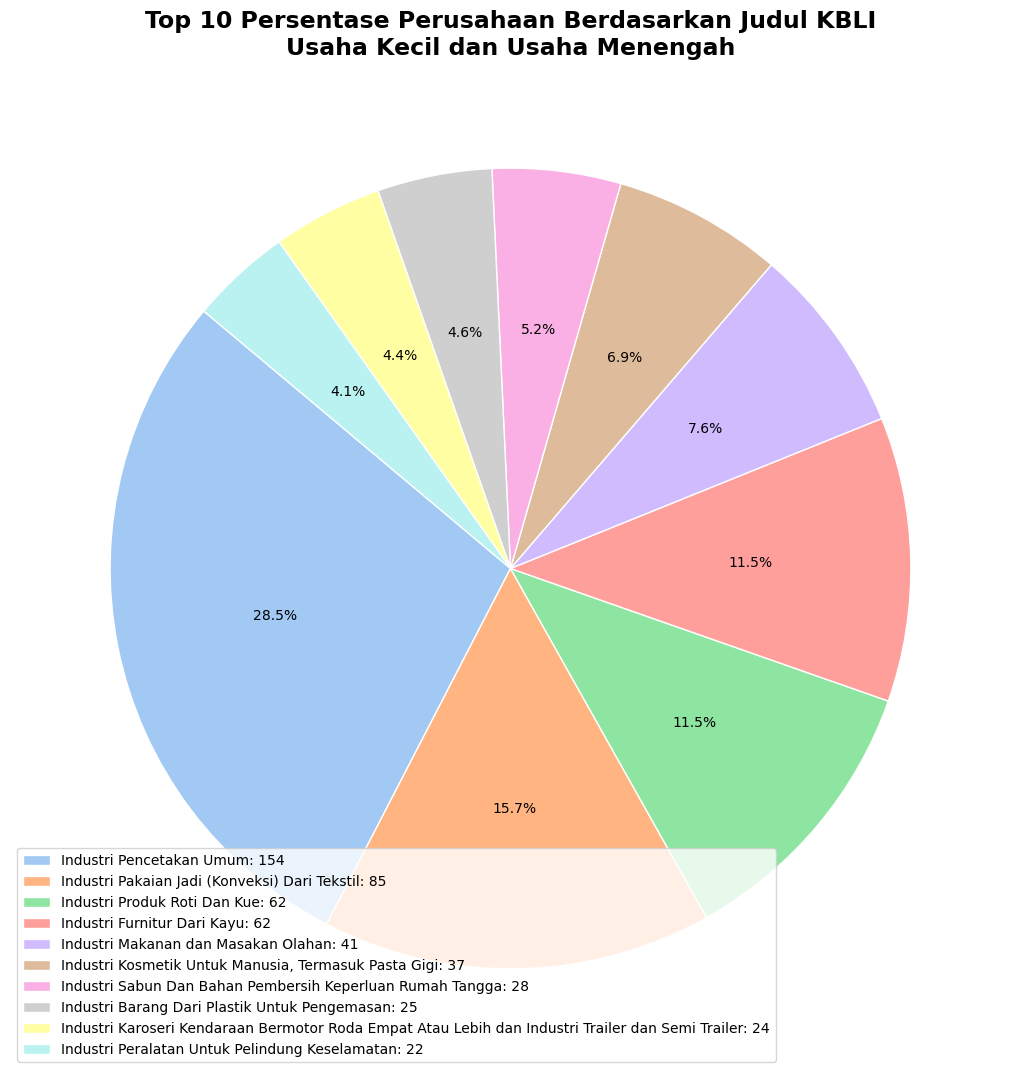

In [31]:
# Menghitung jumlah perusahaan berdasarkan judul KBLI
jumlah_perusahaan = df_filtered1['Judul Kbli'].value_counts().nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan judul KBLI dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Perusahaan Berdasarkan Judul KBLI\nUsaha Kecil dan Usaha Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram_pie.png', dpi=300, bbox_inches='tight')

plt.show()

In [32]:
df3 = pd.read_excel("Kopi Kecamatan.xlsx")

In [33]:
df3

,Kecamatan,Total Perusahaan Pengolahan Kopi
0,Asem Rowo,1
1,Benowo,7
2,Bubutan,5
3,Bulak,2
4,Dukuh Pakis,4
5,Gayungan,3
6,Genteng,3
7,Gubeng,13
8,Gunung Anyar,9
9,Jambangan,4


In [34]:
df4 = pd.read_excel("Air Minum Kecamatan.xlsx")

In [35]:
df4

,Kecamatan,Jumlah Industri Air Minum Isi Ulang
0,Asem Rowo,9
1,Benowo,7
2,Bulak,2
3,Dukuh Pakis,10
4,Gayungan,4
5,Genteng,3
6,Gubeng,12
7,Gunung Anyar,6
8,Jambangan,11
9,Karang Pilang,11


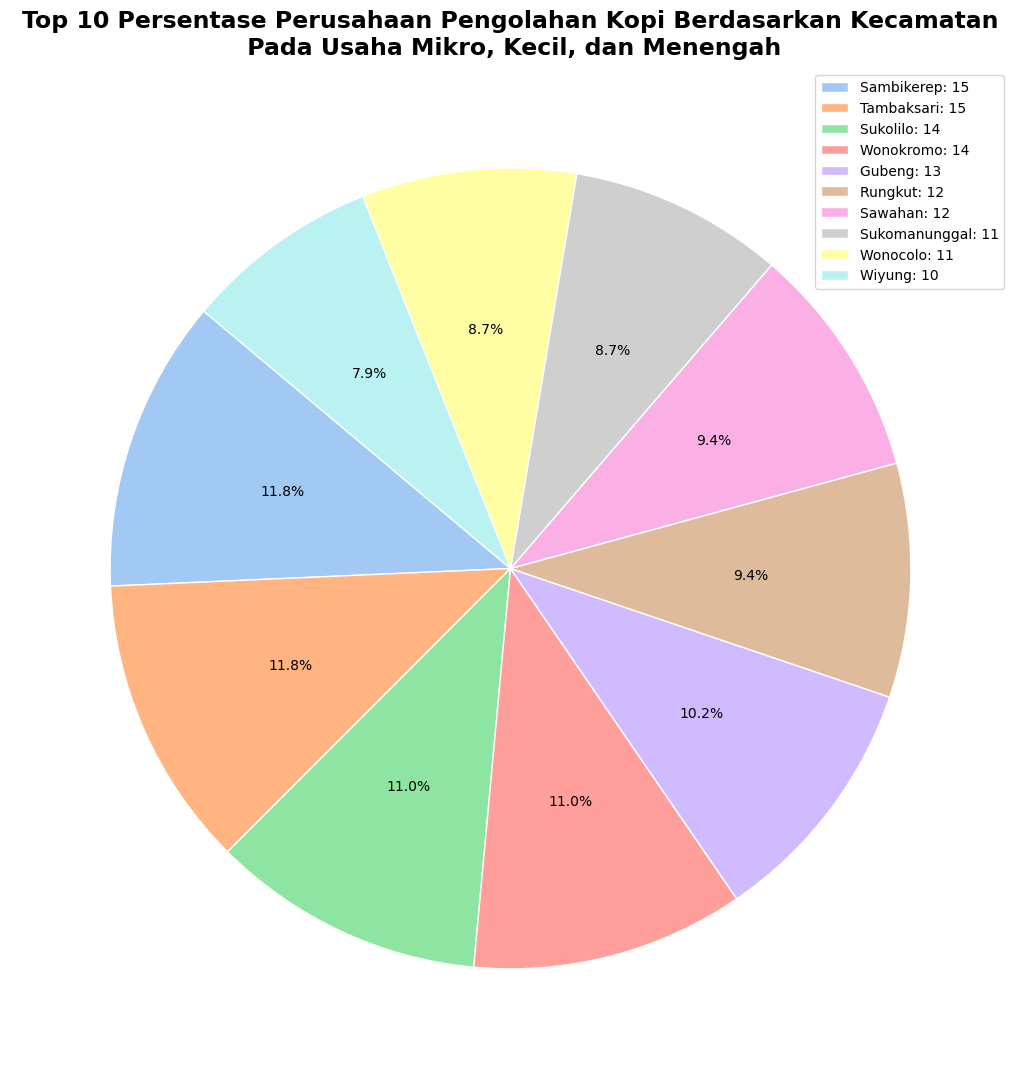

In [36]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df3.set_index('Kecamatan')['Total Perusahaan Pengolahan Kopi'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Perusahaan Pengolahan Kopi Berdasarkan Kecamatan\n Pada Usaha Mikro, Kecil, dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('Pengolah Kopi Kecamatan.png', dpi=300, bbox_inches='tight')

plt.show()

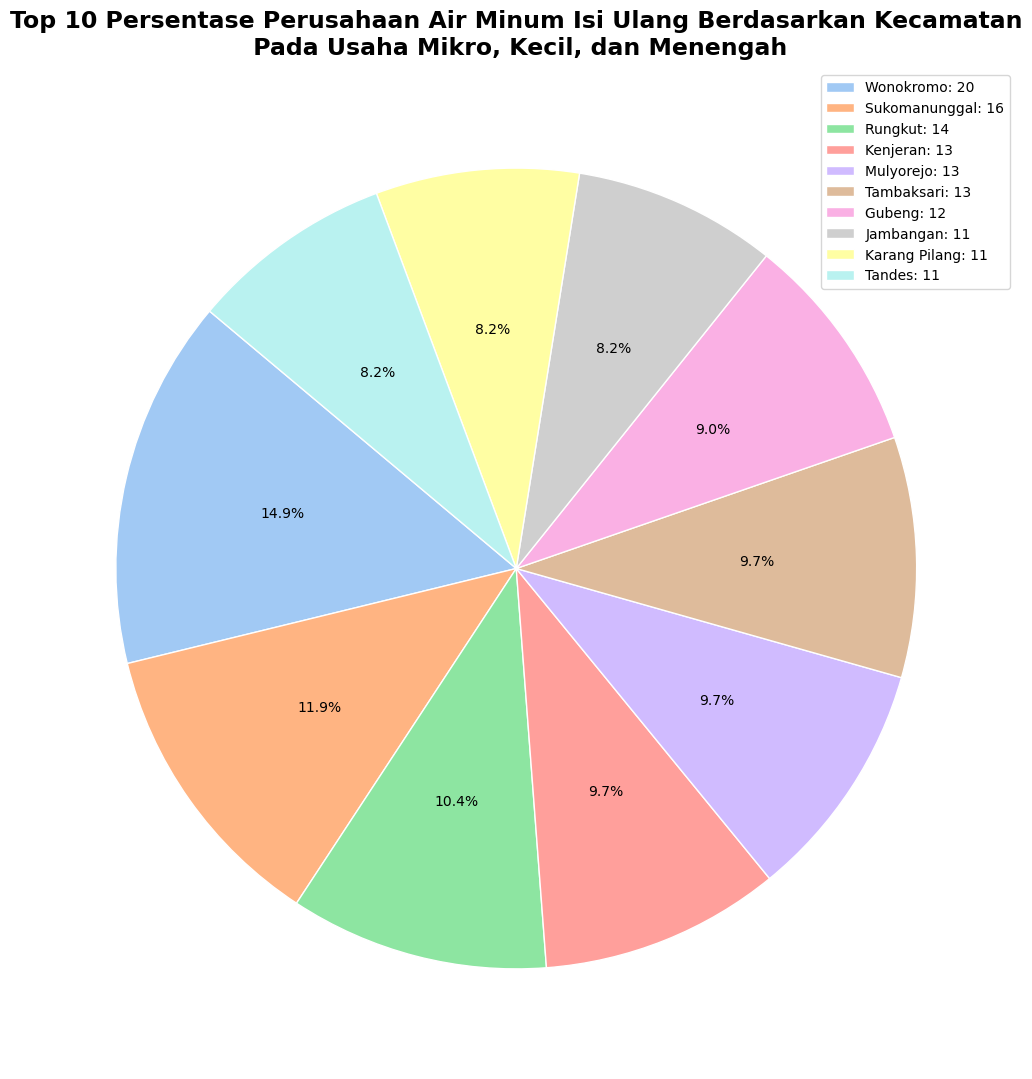

In [37]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df4.set_index('Kecamatan')['Jumlah Industri Air Minum Isi Ulang'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Perusahaan Air Minum Isi Ulang Berdasarkan Kecamatan\n Pada Usaha Mikro, Kecil, dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram Air Minum Isi Ulang Kecamatan.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
df5 = pd.read_excel("kelurahan_minum.xlsx")

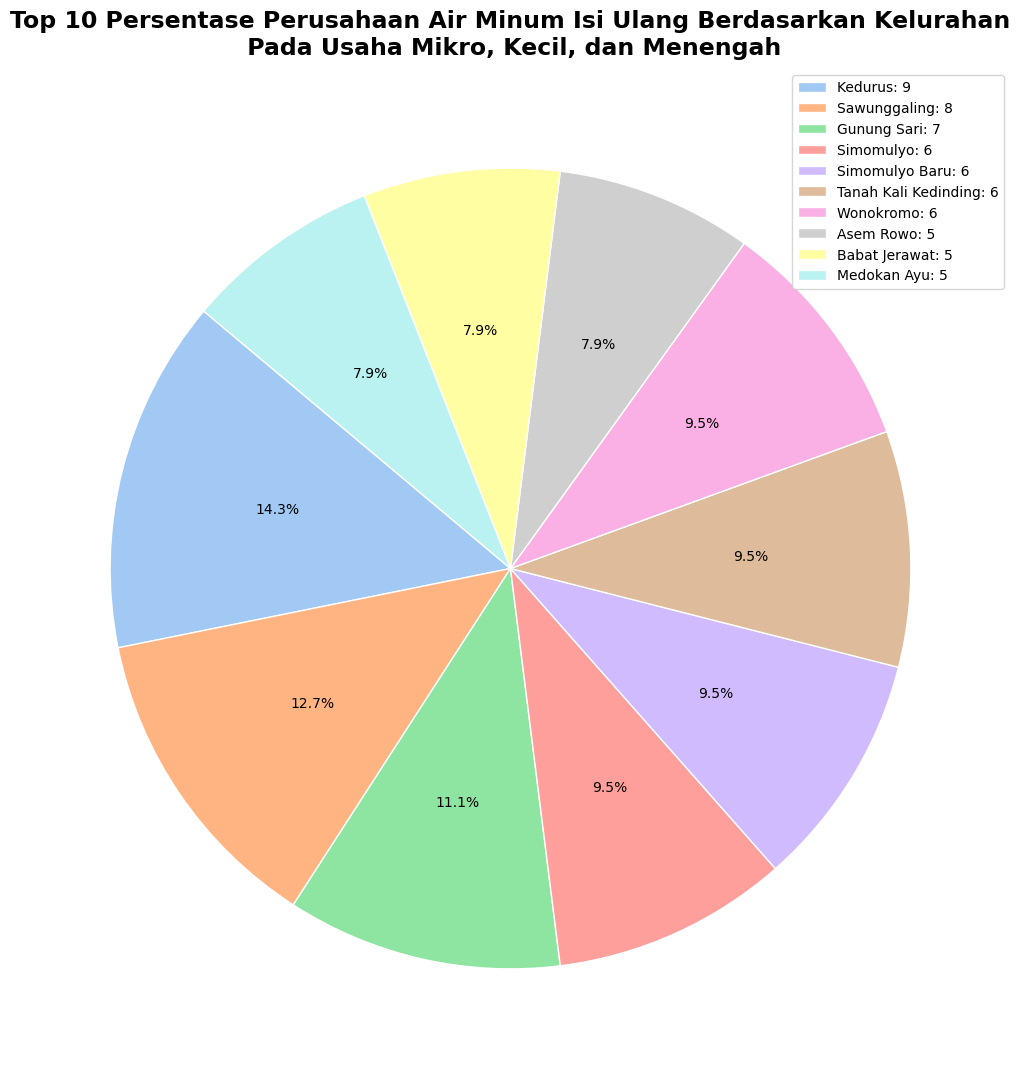

In [39]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df5.set_index('Kelurahan')['minum'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Perusahaan Air Minum Isi Ulang Berdasarkan Kelurahan\n Pada Usaha Mikro, Kecil, dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram Air Minum Isi Ulang Kelurahan.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
df6 = pd.read_excel("kelurahan_kopi.xlsx")

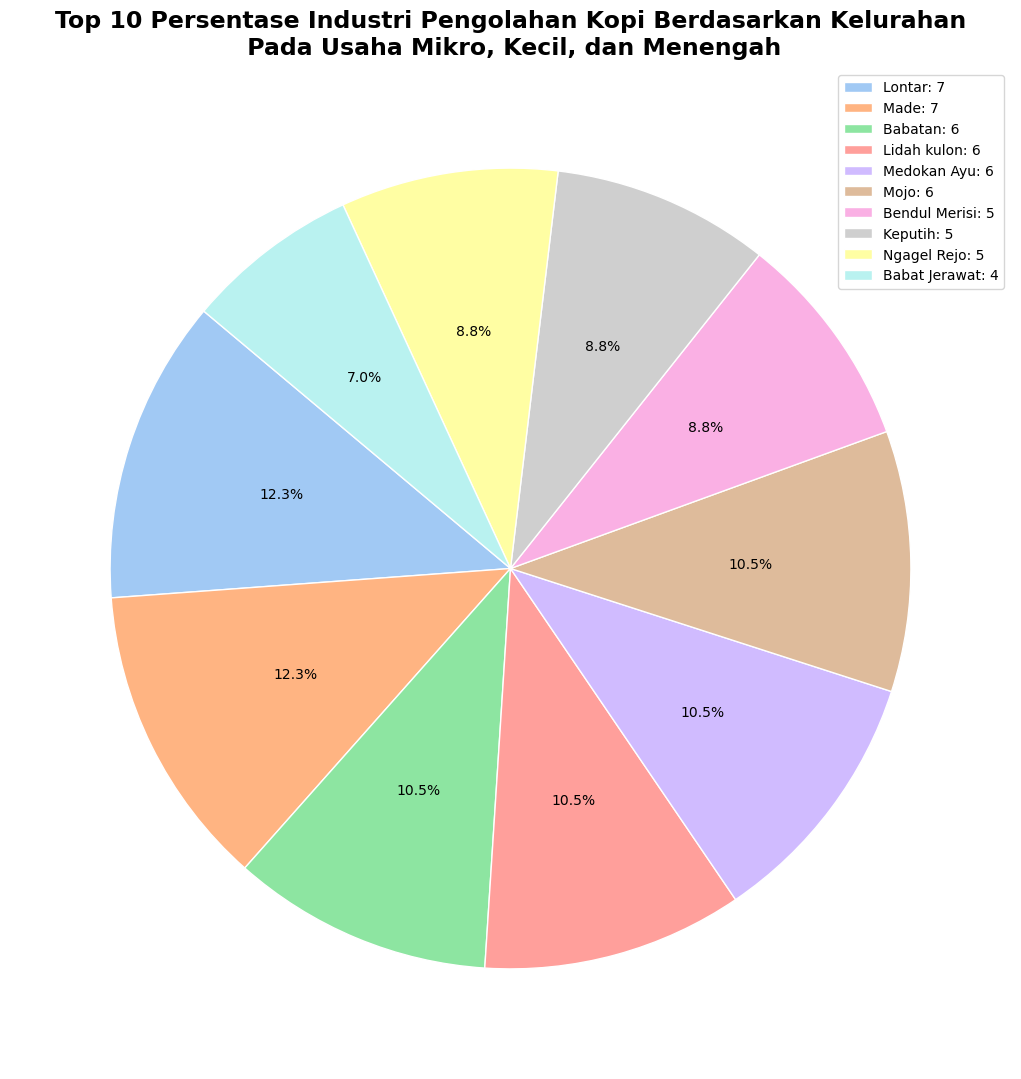

In [41]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df6.set_index('kelurahan')['kopi'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Industri Pengolahan Kopi Berdasarkan Kelurahan\n Pada Usaha Mikro, Kecil, dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram Kopi Kelurahan.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
df7 = pd.read_excel("Industri Barang Dari Plastik Untuk Pengemasan.xlsx")

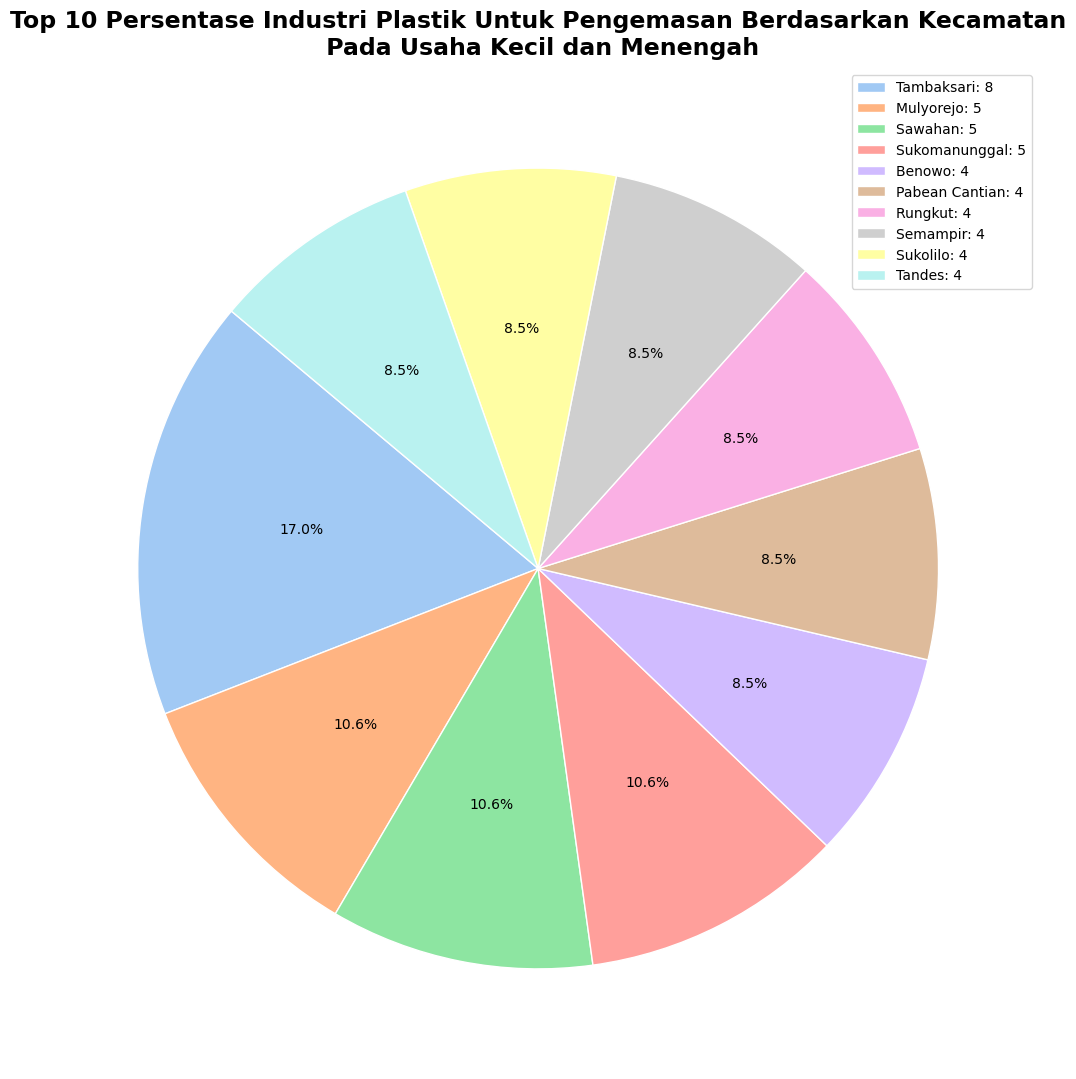

In [43]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df7.set_index('kecamatan')['Industri Barang Dari Plastik Untuk Pengemasan'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Industri Plastik Untuk Pengemasan Berdasarkan Kecamatan\n Pada Usaha Kecil dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram plastik pengemasan kecil menengah kec.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df8 = pd.read_excel("kosmetik.xlsx")
df9 = pd.read_excel("Industri Pakaian Jadi.xlsx")
df10 = pd.read_excel("Industri Makanan dan Masakan.xlsx")
df11 = pd.read_excel("karoseri1.xlsx")
df12 = pd.read_excel("furniture.xlsx")
df13 = pd.read_excel("Industri Pencetakan Umum.xlsx")
df14 = pd.read_excel("Industri Produk Roti dan Kue.xlsx")
df15 = pd.read_excel("Industri Sabun Dan Bahan Pembersih Keperluan Rumah Tangga.xlsx")
df16 = pd.read_excel("KECAMATAN INDUSTRI PERLATAN UNTUK PELINDUNG KESEHATAN.xlsx")

In [ ]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df8.set_index('kecamatan')['jumlah'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Industri Kosmetik Untuk Manusia Berdasarkan Kecamatan\n Pada Usaha Kecil dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram kosmetik manusia kecil menengah kec.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df9.set_index('kecamatan')['jumlah'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Industri Pakaian Jadi Berdasarkan Kecamatan\n Pada Usaha Kecil dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram paiakain jadi kecil menengah kec.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df10.set_index('kecamatan')['jumlah'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Industri Makanan Masakan Berdasarkan Kecamatan\n Pada Usaha Kecil dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram makanan masakan kecil menengah kec.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df21 = pd.read_excel("karoseri.xlsx")
df22 = pd.read_excel("furniture.xlsx")

In [ ]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df21.set_index('kecamatan')['jumlah'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Industri Karoseri Kendaraan Bermotor Berdasarkan Kecamatan\n Pada Usaha Kecil dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram karoseri kendaraan kecil menengah kec.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df12.set_index('kecamatan')['jumlah'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Industri Furniture dari Kayu Berdasarkan Kecamatan\n Pada Usaha Kecil dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram furniture kayu kecil menengah kec.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df13.set_index('kecamatan')['jumlah'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Industri Pencetakan Umum Berdasarkan Kecamatan\n Pada Usaha Kecil dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram pencetakan umum kecil menengah kec.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df14.set_index('kecamatan')['jumlah'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Industri Produk Roti & Kue Berdasarkan Kecamatan\n Pada Usaha Kecil dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram roti kue kecil menengah kec.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df15.set_index('kecamatan')['jumlah'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Industri Sabun & Bahan Pembersih Keperluan Rumah Tangga Berdasarkan Kecamatan\n Pada Usaha Kecil dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram sabun bahan pembersih kecil menengah kec.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Menghitung jumlah perusahaan berdasarkan Kecamatan
jumlah_perusahaan = df16.set_index('kecamatan')['jumlah'].nlargest(10)

# Membuat warna yang lebih modern
colors = sns.color_palette('pastel')[0:len(jumlah_perusahaan)]

# Membuat diagram pie dengan gaya modern
plt.figure(figsize=(13, 13))
patches, texts, autotexts = plt.pie(jumlah_perusahaan, colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'}, autopct='%1.1f%%', pctdistance=0.6)

# Mengatur keterangan warna dengan Kecamatan dan jumlah perusahaan
labels = [f'{label}: {jumlah_perusahaan[label]}' for label in jumlah_perusahaan.index]
plt.legend(patches, labels, loc="best")

plt.title('Top 10 Persentase Industri Peralatan Untuk Pelindung Kesehatan Berdasarkan Kecamatan\n Pada Usaha Kecil dan Menengah', loc='center', fontsize=17, fontweight='bold', pad=10) 

# Menghilangkan garis-garis di sekitar diagram pie
plt.gca().set_aspect('equal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, bottom=False)

# Menyimpan diagram pie sebagai file gambar
plt.savefig('diagram pelindung kesehatan kecil menengah kec.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
data = pd.read_excel("Data Industri.xlsx")

In [ ]:
data.head(10)

In [ ]:
# List kolom yang ingin dihapus
kolom_dihapus1 = ['longitude',	'latitude', 'Npwp Perusahaan', 'Uraian Status Penanaman Modal', 
                 'Alamat Usaha', 'kecamatan_usaha', 'kelurahan_usaha', 
                 'KL/Sektor Pembina', 'Nama User', 'Nomor Identitas User', 
                 'Email', 'Nomor Telp', 'luas_tanah', 'satuan_tanah']

# Menghapus kolom-kolom tersebut dari dataframe
data1= data.drop(kolom_dihapus1, axis=1)

data1